In [42]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests

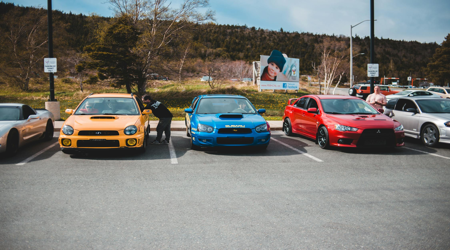

In [43]:
# Reading image form url
image = Image.open(requests.get('https://images.pexels.com/photos/4517056/pexels-photo-4517056.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

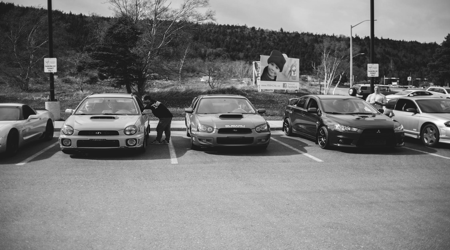

In [44]:
#converting RGB image to grey scale image
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

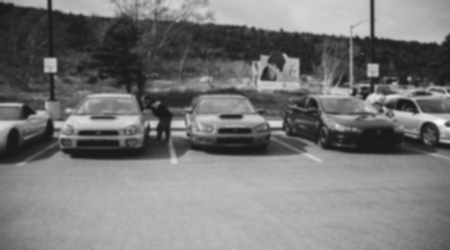

In [45]:
#removing noise usinf Gaussianblur
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

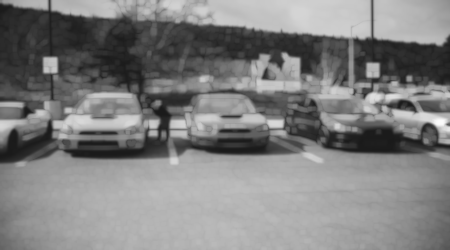

In [46]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

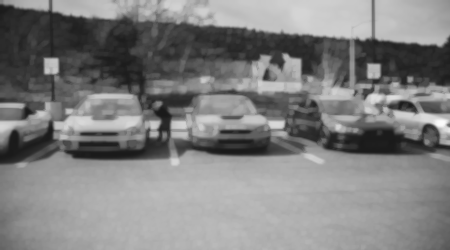

In [47]:
#Applying morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

In [48]:
car_cascade_src = '/content/drive/MyDrive/googlecollab/Collab Code/Required Files/vehicle.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

3  cars found


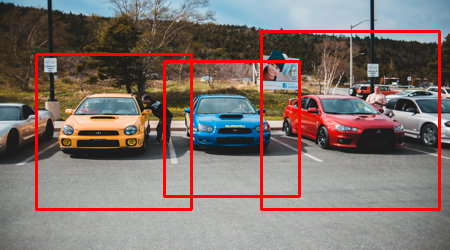

In [49]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [53]:
# Reading image form url
image2 = Image.open(requests.get('https://images.pexels.com/photos/8553100/pexels-photo-8553100.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

In [54]:
bus_cascade_src = '/content/drive/MyDrive/googlecollab/Collab Code/Required Files/vehiclef.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

1  bus's found


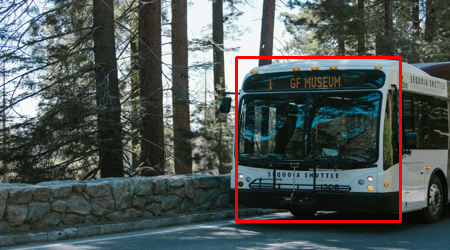

In [55]:
cnt = 0
for (x,y,w,h) in bus:
  cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

In [56]:
cascade_src = '/content/drive/MyDrive/googlecollab/Collab Code/Required Files/vehicle.xml'
video_src = '/content/drive/MyDrive/googlecollab/Collab Code/Required Files/traffic-843309_1280(4).jpg'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250))

In [57]:
while True:
    ret, img = cap.read()

    if (type(img) == type(None)):
        break

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

    video.write(img)
video.release()